In [ ]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Line fitting the matrix way
This in-class exercise walks you through the following steps to fit a line to several datasets:
1. Create the datasets.
2. Construct design matrices.
3. Compute the weights using matrix inversion.
4. Plot the data and the fitted line.

## Linear (line) models
<article class="message task"><a class="anchor" id="loading"></a>
    <div class="message-header">
        <span>Task 1: Identifying parameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load the neccessary libraries and to construct the datasets.

2. Identify the inputs and the labels of each dataset. 




</div></article>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])

<article class="message task"><a class="anchor" id="loading2"></a>
    <div class="message-header">
        <span>Task 2: Identifying parameters and constructing the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should return a matrix `X`
 containing the inputs and an array `y`
 containing the labels. Use the function to obtain the inputs and labels for each dataset.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Slicing might be helpful here.


  </div>
</article>
2. Complete the code below and construct the design matrix for the other datasets. Print your results.



</div></article>



In [27]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X (numpy array): The input matrix.
    y (numpy array): The labels array.
    """
    X = dataset[:,:1]
    y = dataset[:,1]
    
    # return the results as a tuple
    return X, y

X1, y1 = separate_inputs_labels(dataset_1)
X2, y2 = separate_inputs_labels(dataset_2)
X3, y3 = separate_inputs_labels(dataset_3)
    
# construct the design matrix    
X1_design = np.column_stack((X1, np.ones(X1.shape)))
X2_design = np.column_stack((X2, np.ones(X2.shape)))
X3_design = np.column_stack((X3, np.ones(X3.shape)))

# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)

print("\n")

print("X2 = \n",X2)
print("y2 =", y2)
print("Design Matrix for Dataset 2:\n", X2_design)

print("\n")

print("X3 = \n",X3)
print("y3 =", y3)
print("Design Matrix for Dataset 3:\n", X3_design)

X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10.  1.]
 [ 9.  1.]]


X2 = 
 [[5]
 [7]]
y2 = [1 5]
Design Matrix for Dataset 2:
 [[5. 1.]
 [7. 1.]]


X3 = 
 [[4]
 [5]]
y3 = [2 3]
Design Matrix for Dataset 3:
 [[4. 1.]
 [5. 1.]]


<article class="message task"><a class="anchor" id="loading3"></a>
    <div class="message-header">
        <span>Task 3: Solve for model parameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Find the inverse of the design matrix for each dataset constructed above.
2. Calculate the model weights, then print your results.
3. Use the `plot_model`
 function to plot your results.
4. Visually inspect the plots and interpret the meaning and influence of each term.



</div></article>



Weights for Dataset 1: [-4. 42.]
Weights for Dataset 2: [ 2. -9.]
Weights for Dataset 3: [ 1. -2.]


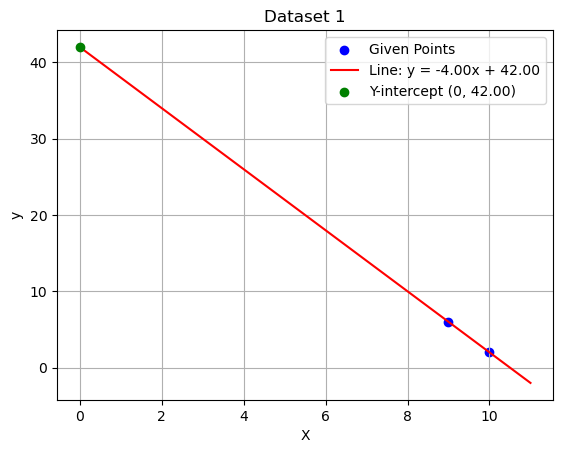

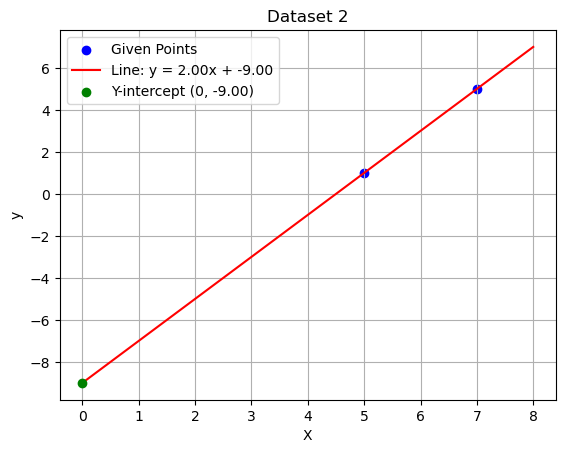

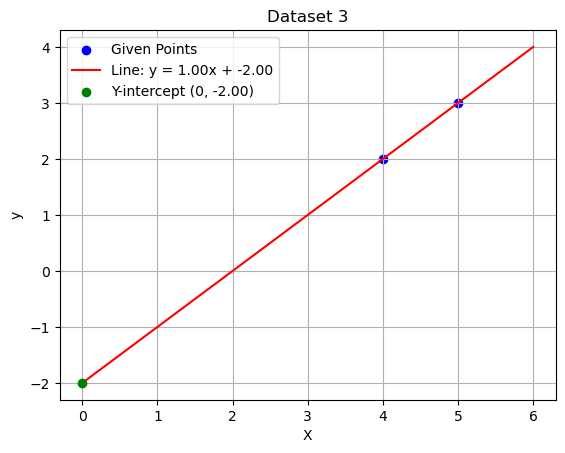

In [28]:
weights1 = np.linalg.inv(X1_design) @ y1
weights2 = np.linalg.inv(X2_design) @ y2
weights3 = np.linalg.inv(X3_design) @ y3

print("Weights for Dataset 1:", weights1)
print("Weights for Dataset 2:", weights2)
print("Weights for Dataset 3:", weights3)

# Function to plot data points and fitted line
def plot_model(X, y, weights, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals + weights[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {weights[0]:.2f}x + {weights[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[1], color='green', zorder=5, label=f'Y-intercept (0, {weights[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, weights1, 'Dataset 1')
plot_model(X2, y2, weights2, 'Dataset 2')
plot_model(X3, y3, weights3, 'Dataset 3')

If you have more time, complete the next task.
<article class="message task"><a class="anchor" id="loading5"></a>
    <div class="message-header">
        <span>Task 4: A new dataset</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-infinity"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Run the cell below to define a new dataset.
1. Identify the inputs and the labels, then reuse the code from previous tasks to construct a design matrix.
2. Calculate the inverse of the design matrix. This step should result in an error. What are the possible reasons for getting this error?

**Note:** For pedagogical reasons, next week we will return to this dataset, as you will have the necessary tools to fit a model for this scenario.



</div></article>



In [29]:
dataset_4 = np.array([[9, 1], [7, 2],[3, 8], [1, 3],[4, 3]])

In [33]:
X4, y4 = separate_inputs_labels(dataset_4)
    
X4_design = np.column_stack((X4, np.ones(X4.shape)))

weights4 = np.linalg.inv(X4_design) @ y4

LinAlgError: Last 2 dimensions of the array must be square

Fails because the matrix is not square.